- Loads a dataset
- runs on penguin dataset and one more (read using using pandas)
- fit best GMM on every numeric variable in dataset
- plot pdf and cdf using matplotlib
- simulate own set of numbers using same GMM
- plot data from dataset and simulated data for each variable as histograms

In [1]:
# Importing necessary libraries and files to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gmm import GMM
import analyze

In [2]:
# loading the penguin dataset
penguins = pd.read_csv("penguin/penguins_size.csv")
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Fitting models for k = 2 to k = 10 for culmen_length_mm
K = 2, Log-Likelihood = -1044.55, AIC = 2101.11
K = 3, Log-Likelihood = -1045.20, AIC = 2108.39
K = 4, Log-Likelihood = -1038.63, AIC = 2101.26
K = 5, Log-Likelihood = -1031.52, AIC = 2093.03
K = 6, Log-Likelihood = -1031.66, AIC = 2099.31
K = 7, Log-Likelihood = -1031.51, AIC = 2105.03
K = 8, Log-Likelihood = -1030.39, AIC = 2108.79
K = 9, Log-Likelihood = -1029.58, AIC = 2113.16
K = 10, Log-Likelihood = -1029.54, AIC = 2119.08

Best Model for culmen_length_mm:
Number of components: 5
Weights: [0.22371899 0.24968623 0.24853833 0.04865788 0.22939858]
Means: [46.10265278 37.07467936 41.38136995 53.30248618 50.01082331]
Standard deviations: [1.00715301 1.79810429 1.7000604  3.02712148 1.25341515]
Calculating the pdf and cdf:


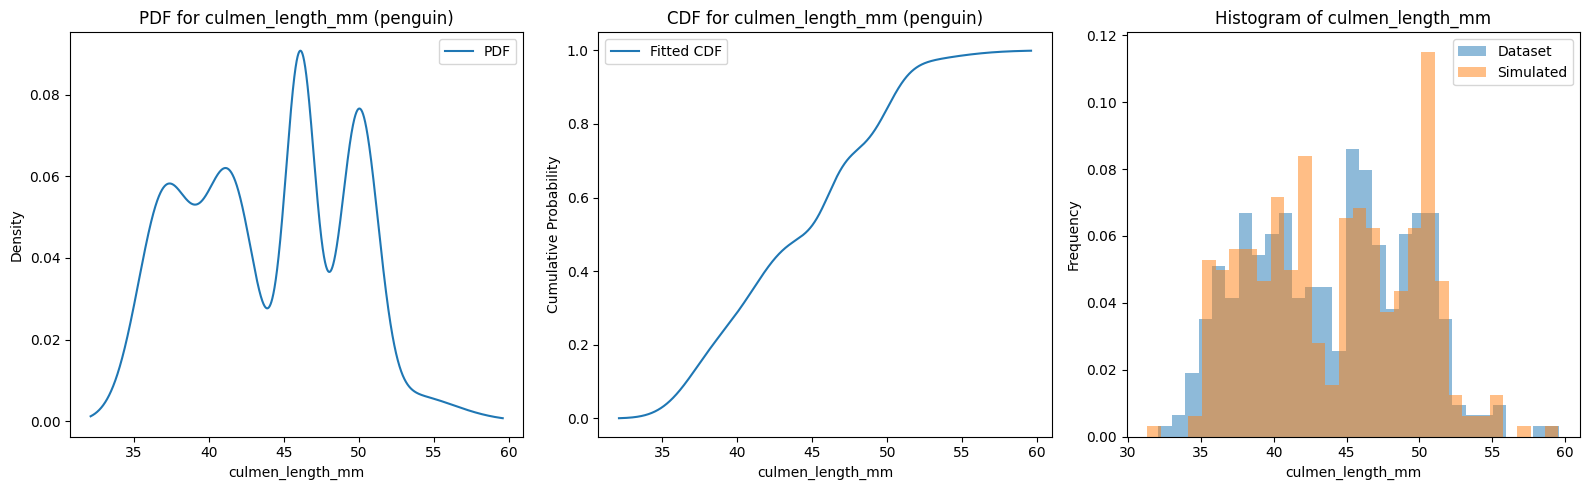

Fitting models for k = 2 to k = 10 for culmen_depth_mm
K = 2, Log-Likelihood = -697.77, AIC = 1407.55
K = 3, Log-Likelihood = -695.58, AIC = 1409.16
K = 4, Log-Likelihood = -692.55, AIC = 1409.09
K = 5, Log-Likelihood = -690.00, AIC = 1410.00
K = 6, Log-Likelihood = -689.32, AIC = 1414.64
K = 7, Log-Likelihood = -687.89, AIC = 1417.78
K = 8, Log-Likelihood = -684.22, AIC = 1416.45
K = 9, Log-Likelihood = -683.48, AIC = 1420.96
K = 10, Log-Likelihood = -683.34, AIC = 1426.67

Best Model for culmen_depth_mm:
Number of components: 2
Weights: [0.63076141 0.36923859]
Means: [18.37686815 15.05733822]
Standard deviations: [1.20728078 1.04426176]
Calculating the pdf and cdf:


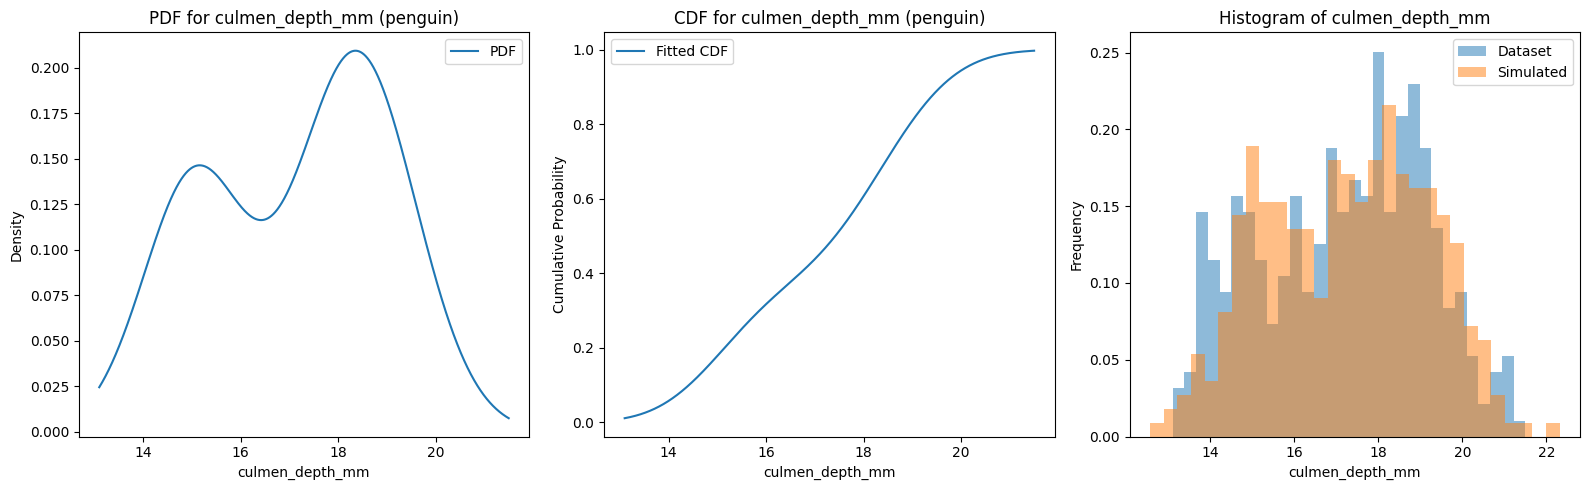

Fitting models for k = 2 to k = 10 for flipper_length_mm
K = 2, Log-Likelihood = -1343.19, AIC = 2698.39
K = 3, Log-Likelihood = -1342.54, AIC = 2703.09
K = 4, Log-Likelihood = -1340.99, AIC = 2705.99
K = 5, Log-Likelihood = -1333.33, AIC = 2696.67
K = 6, Log-Likelihood = -1331.24, AIC = 2698.49
K = 7, Log-Likelihood = -1336.49, AIC = 2714.98
K = 8, Log-Likelihood = -1328.91, AIC = 2705.82
K = 9, Log-Likelihood = -1325.86, AIC = 2705.71
K = 10, Log-Likelihood = -1324.82, AIC = 2709.64

Best Model for flipper_length_mm:
Number of components: 5
Weights: [0.38625349 0.24624322 0.20691501 0.12467835 0.03590992]
Means: [193.57297962 217.04825563 185.29454443 209.50358397 229.44965301]
Standard deviations: [4.68025932 5.07988125 5.09332946 4.98886063 0.93350289]
Calculating the pdf and cdf:


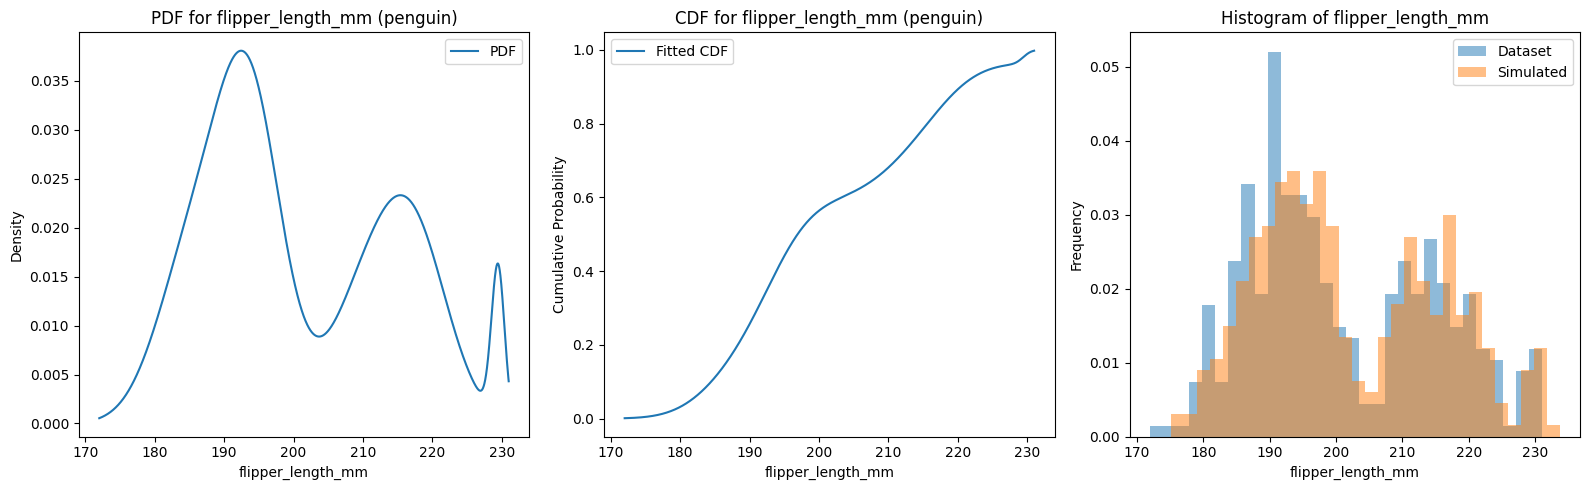

Fitting models for k = 2 to k = 10 for body_mass_g
K = 2, Log-Likelihood = -2744.11, AIC = 5500.22
K = 3, Log-Likelihood = -2741.22, AIC = 5500.43
K = 4, Log-Likelihood = -2739.37, AIC = 5502.74
K = 5, Log-Likelihood = -2739.11, AIC = 5508.22
K = 6, Log-Likelihood = -2737.98, AIC = 5511.96
K = 7, Log-Likelihood = -2738.20, AIC = 5518.41
K = 8, Log-Likelihood = -2738.29, AIC = 5524.57
K = 9, Log-Likelihood = -2738.29, AIC = 5530.59
K = 10, Log-Likelihood = -2738.28, AIC = 5536.56

Best Model for body_mass_g:
Number of components: 2
Weights: [0.59683025 0.40316975]
Means: [3665.15624029 4996.10467217]
Standard deviations: [403.87986913 540.19532527]
Calculating the pdf and cdf:


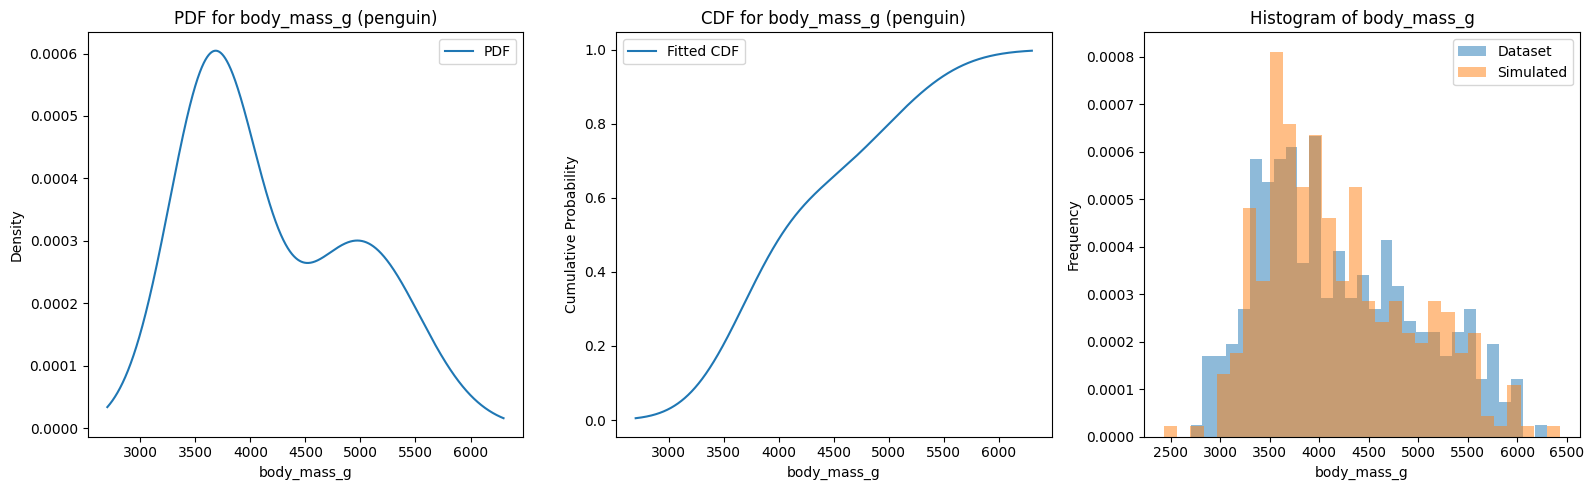

In [ ]:
# selecting the numeric columns
columns = penguins.select_dtypes(include = [np.number]).columns

# iterate through the columns
for col in columns:
    # dropping NA values and convert to numpy
    data = penguins[col].dropna().to_numpy()

    best_aic = float('inf')
    best_model = None
    best_params = None

    # fit the models using different k
    print(f"Fitting models for k = 2 to k = 10 for {col}")
    for i in range(2, 11):
        gmm = GMM()
        weights, means, sigmas = gmm.fit(data, i)
        aic = analyze.calc_AIC(data, weights, means, sigmas)
        log_likelihood = analyze.calc_llh(data, weights, means, sigmas)
        
        print(f"K = {i}, Log-Likelihood = {log_likelihood:.2f}, AIC = {aic:.2f}")

        # Update best model if this model has the lowest AIC
        if aic < best_aic:
            best_aic = aic
            best_model = gmm
            best_params = (i, weights, means, sigmas)

    # Getting the best model
    K, weights, means, sigmas = best_params
    print(f"\nBest Model for {col}:")
    print(f"Number of components: {K}")
    print(f"Weights: {weights}")
    print(f"Means: {means}")
    print(f"Standard deviations: {sigmas}")
    print("Calculating the pdf and cdf:")
    x_vals = np.linspace(min(data), max(data), 10000)
    pdf_vals = best_model.pdf(x_vals, weights, means, sigmas)
    cdf_vals = best_model.cdf(x_vals, weights, means, sigmas)
    simulated_data = best_model.rvs(wgt = weights, mu = means, sigma = sigmas, size = len(data))
    
    plt.figure(figsize = (16, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x_vals, pdf_vals, label = "PDF")
    plt.title(f"PDF for {col} (penguin)")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(x_vals, cdf_vals, label = "Fitted CDF")
    plt.title(f"CDF for {col} (penguin)")
    plt.xlabel(col)
    plt.ylabel("Cumulative Probability")
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.hist(data, bins = 30, alpha = 0.5, label = "Dataset", density = True)
    plt.hist(simulated_data, bins = 30, alpha = 0.5, label = "Simulated", density = True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

**Dataset 2**: the pokemon stats dataset was taken from this kaggle link: https://www.kaggle.com/datasets/pauloarayasantiago/pokmon-stats-across-generations-and-typings

In [ ]:
# loading the pokemon stats dataset
pokemon = pd.read_csv("pokemon/pokemon_dataset.csv")
pokemon

,pokemon_id,name,primary_type,secondary_type,first_appreance,generation,category,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
0,1,bulbasaur,grass,poison,red/blue,gen 1,regular,318,45,49,49,65,65,45
1,2,ivysaur,grass,poison,red/blue,gen 1,regular,405,60,62,63,80,80,60
2,3,venusaur,grass,poison,red/blue,gen 1,regular,525,80,82,83,100,100,80
3,4,charmander,fire,NaN,red/blue,gen 1,regular,309,39,52,43,60,50,65
4,5,charmeleon,fire,NaN,red/blue,gen 1,regular,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,electric,dragon,scarlet/violet,gen 9,paradox,590,125,73,91,137,89,75
1021,1022,iron-boulder,rock,psychic,scarlet/violet,gen 9,regular,590,90,120,80,68,108,124
1022,1023,iron-crown,steel,psychic,scarlet/violet,gen 9,paradox,590,90,72,100,122,108,98
1023,1024,terapagos,normal,NaN,scarlet/violet,gen 9,legendary,450,90,65,85,65,85,60


In [5]:
# selecting the numeric columns
columns = pokemon.select_dtypes(include = [np.number]).columns
columns = columns.drop("pokemon_id") # dropping pokemon_id column as it is not required
columns

Index(['total_base_stats', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed'],
      dtype='object')

Fitting models for k = 2 to k = 10 for total_base_stats
K = 2, Log-Likelihood = -6224.88, AIC = 12461.75
K = 3, Log-Likelihood = -6215.33, AIC = 12448.66
K = 4, Log-Likelihood = -6193.64, AIC = 12411.29
K = 5, Log-Likelihood = -6142.00, AIC = 12313.99
K = 6, Log-Likelihood = -6132.76, AIC = 12301.53
K = 7, Log-Likelihood = -6130.46, AIC = 12302.91
K = 8, Log-Likelihood = -6129.80, AIC = 12307.60
K = 9, Log-Likelihood = -6124.82, AIC = 12303.64
K = 10, Log-Likelihood = -6116.07, AIC = 12292.14

Best Model for total_base_stats:
Number of components: 10
Weights: [0.19353094 0.10116083 0.02341462 0.06377891 0.11692044 0.10145532
 0.13862635 0.05631489 0.11493752 0.08986018]
Means: [490.96247603 281.9083753  677.08334534 358.77137277 526.29571561
 583.34261011 315.65141766 223.98342054 410.77581796 457.53215887]
Standard deviations: [11.82950999 21.11704496 11.71862981 15.81588675 11.56775155 14.26459808
 15.45744762 26.63635068 13.55652653 12.60775734]
Calculating the pdf and cdf:


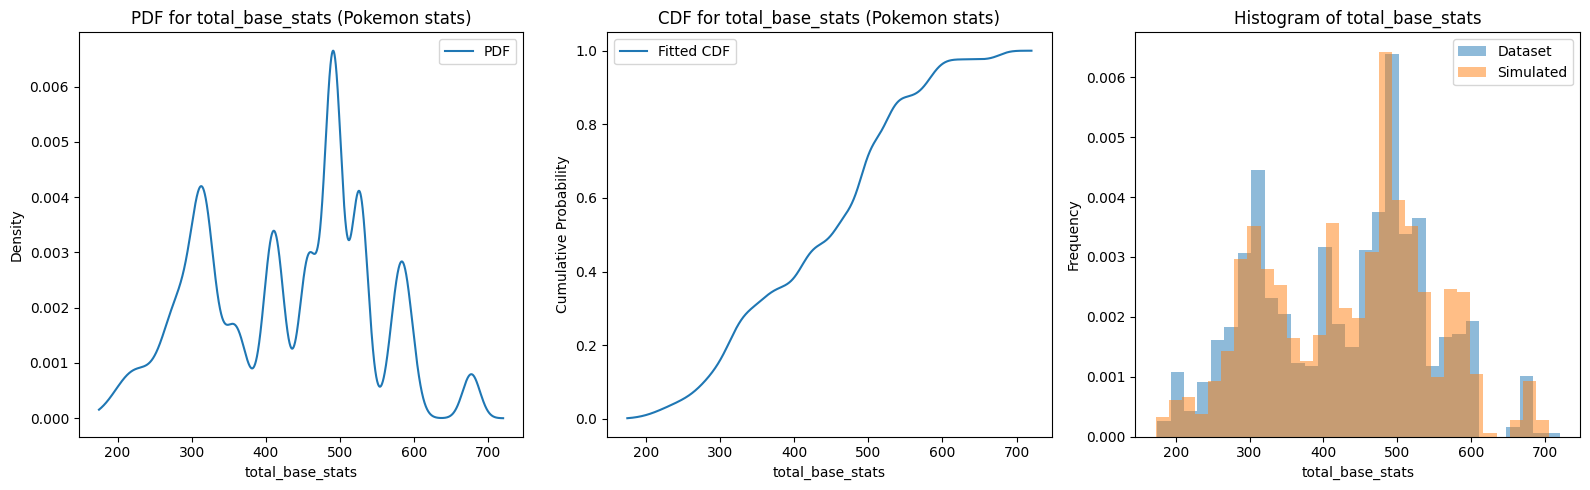

Fitting models for k = 2 to k = 10 for hp
K = 2, Log-Likelihood = -4739.49, AIC = 9490.98
K = 3, Log-Likelihood = -4718.63, AIC = 9455.27
K = 4, Log-Likelihood = -4718.09, AIC = 9460.17
K = 5, Log-Likelihood = -4716.19, AIC = 9462.38
K = 6, Log-Likelihood = -4709.07, AIC = 9454.14
K = 7, Log-Likelihood = -4707.83, AIC = 9457.65
K = 8, Log-Likelihood = -4705.65, AIC = 9459.31
K = 9, Log-Likelihood = -4704.69, AIC = 9463.37
K = 10, Log-Likelihood = -4700.77, AIC = 9461.54

Best Model for hp:
Number of components: 6
Weights: [0.34653151 0.07716898 0.30057085 0.0115534  0.04526095 0.21891431]
Means: [ 64.44884354 112.52095181  86.02170266 178.4224922   31.96885662
  44.78357014]
Standard deviations: [ 7.98666042 20.28544998 12.53487992 46.55295401 11.10634018  6.41568785]
Calculating the pdf and cdf:


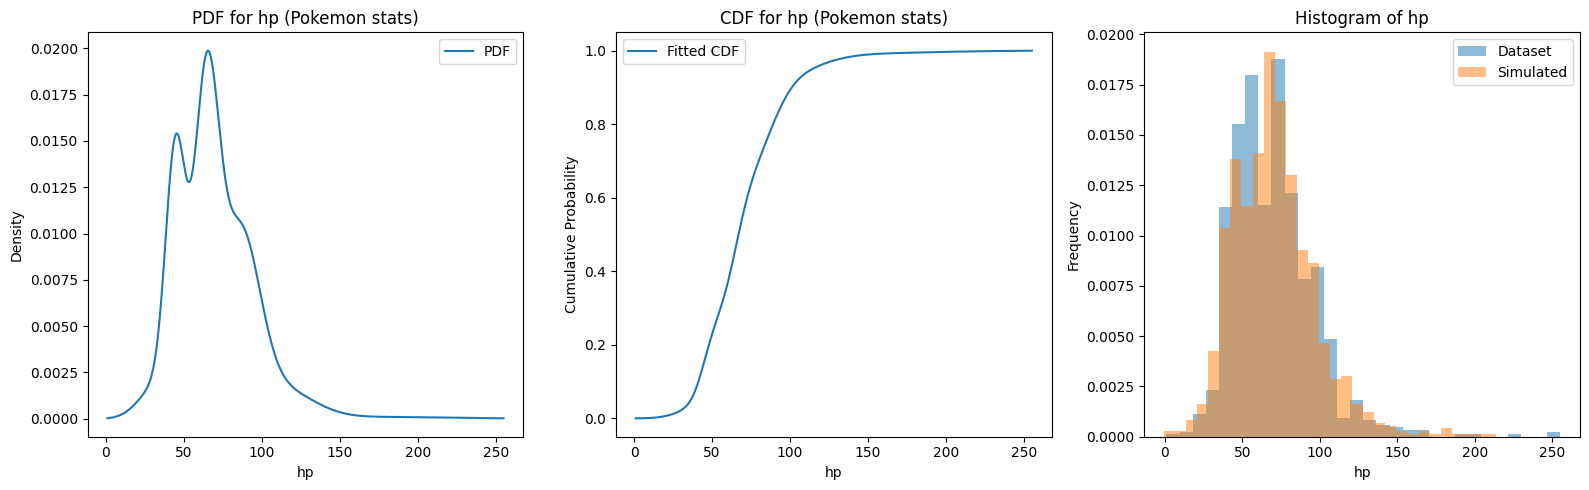

Fitting models for k = 2 to k = 10 for attack
K = 2, Log-Likelihood = -4912.38, AIC = 9836.77
K = 3, Log-Likelihood = -4911.80, AIC = 9841.61
K = 4, Log-Likelihood = -4914.35, AIC = 9852.69
K = 5, Log-Likelihood = -4909.97, AIC = 9849.93
K = 6, Log-Likelihood = -4908.03, AIC = 9852.07
K = 7, Log-Likelihood = -4906.94, AIC = 9855.87
K = 8, Log-Likelihood = -4905.17, AIC = 9858.34
K = 9, Log-Likelihood = -4905.66, AIC = 9865.32
K = 10, Log-Likelihood = -4905.24, AIC = 9870.48

Best Model for attack:
Number of components: 2
Weights: [0.59707034 0.40292966]
Means: [ 59.61222989 104.06098355]
Standard deviations: [19.31622025 21.60345512]
Calculating the pdf and cdf:


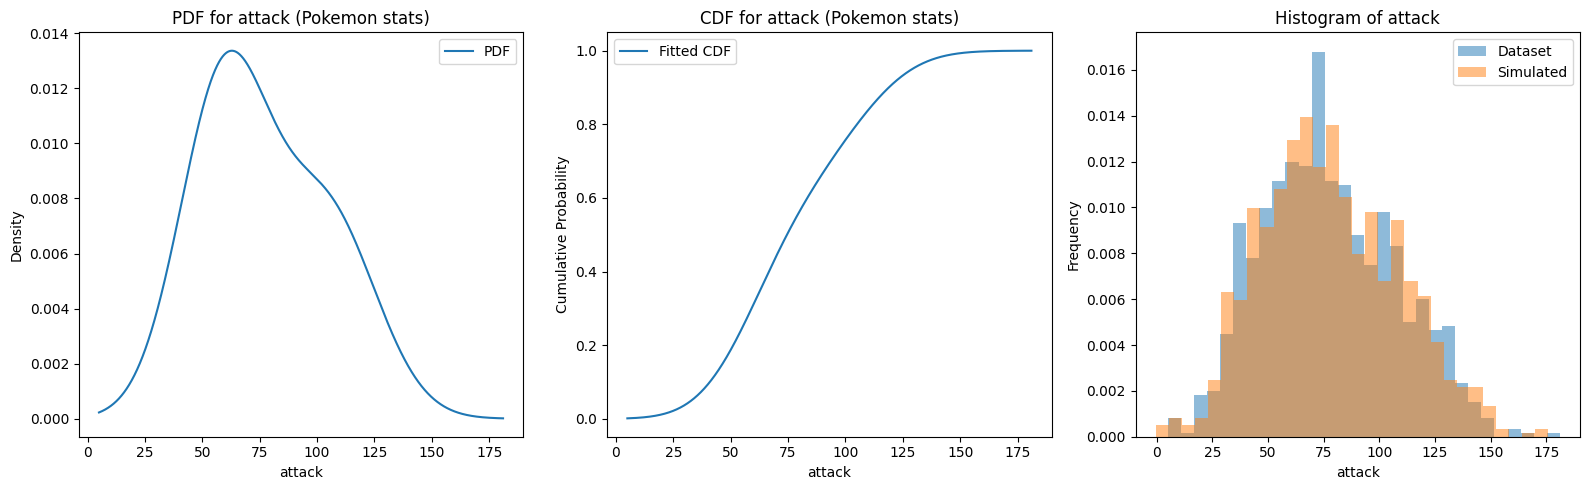

Fitting models for k = 2 to k = 10 for defense
K = 2, Log-Likelihood = -4863.28, AIC = 9738.55
K = 3, Log-Likelihood = -4853.57, AIC = 9725.13
K = 4, Log-Likelihood = -4855.69, AIC = 9735.37
K = 5, Log-Likelihood = -4846.53, AIC = 9723.05
K = 6, Log-Likelihood = -4845.91, AIC = 9727.83
K = 7, Log-Likelihood = -4846.38, AIC = 9734.76
K = 8, Log-Likelihood = -4842.60, AIC = 9733.20
K = 9, Log-Likelihood = -4839.31, AIC = 9732.63
K = 10, Log-Likelihood = -4420.73, AIC = 8901.47

Best Model for defense:
Number of components: 10
Weights: [0.02636874 0.16811506 0.17501375 0.0867402  0.1250862  0.08680899
 0.15187162 0.00908975 0.11237833 0.05852736]
Means: [140.02942144  62.19064584  94.13013738  33.98415704  51.29421933
 117.1771899   78.43137662 188.16285184  41.20786815  70.        ]
Standard deviations: [9.14488348e+00 3.32526586e+00 6.68957257e+00 1.08296513e+01
 3.34942383e+00 9.49486194e+00 4.52363919e+00 2.30433728e+01
 4.33050679e+00 1.00000000e-03]
Calculating the pdf and cdf:


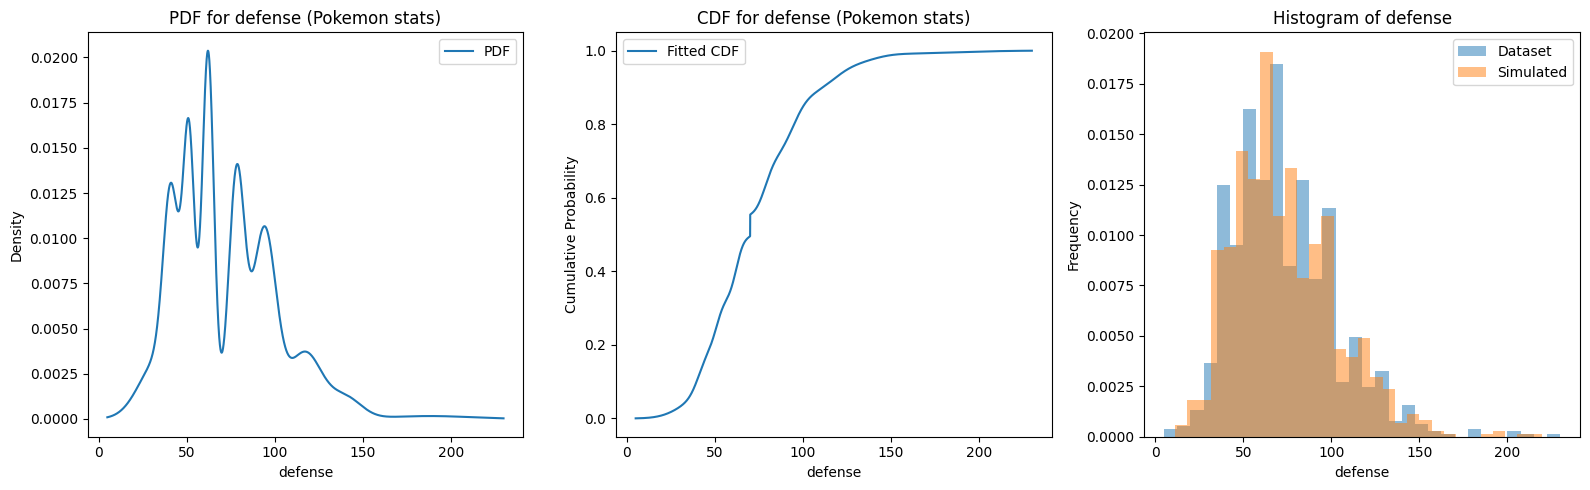

Fitting models for k = 2 to k = 10 for special_attack
K = 2, Log-Likelihood = -4871.25, AIC = 9754.49
K = 3, Log-Likelihood = -4869.19, AIC = 9756.38
K = 4, Log-Likelihood = -4862.49, AIC = 9748.99
K = 5, Log-Likelihood = -4864.62, AIC = 9759.24
K = 6, Log-Likelihood = -4860.25, AIC = 9756.49
K = 7, Log-Likelihood = -4860.30, AIC = 9762.60
K = 8, Log-Likelihood = -4858.66, AIC = 9765.32
K = 9, Log-Likelihood = -4855.98, AIC = 9765.96
K = 10, Log-Likelihood = -4850.11, AIC = 9760.22

Best Model for special_attack:
Number of components: 4
Weights: [0.22796061 0.31891066 0.34458326 0.10854547]
Means: [ 93.51615253  40.69060882  64.09772637 126.20797315]
Standard deviations: [10.6254748  10.96500796 10.73007089 13.59339379]
Calculating the pdf and cdf:


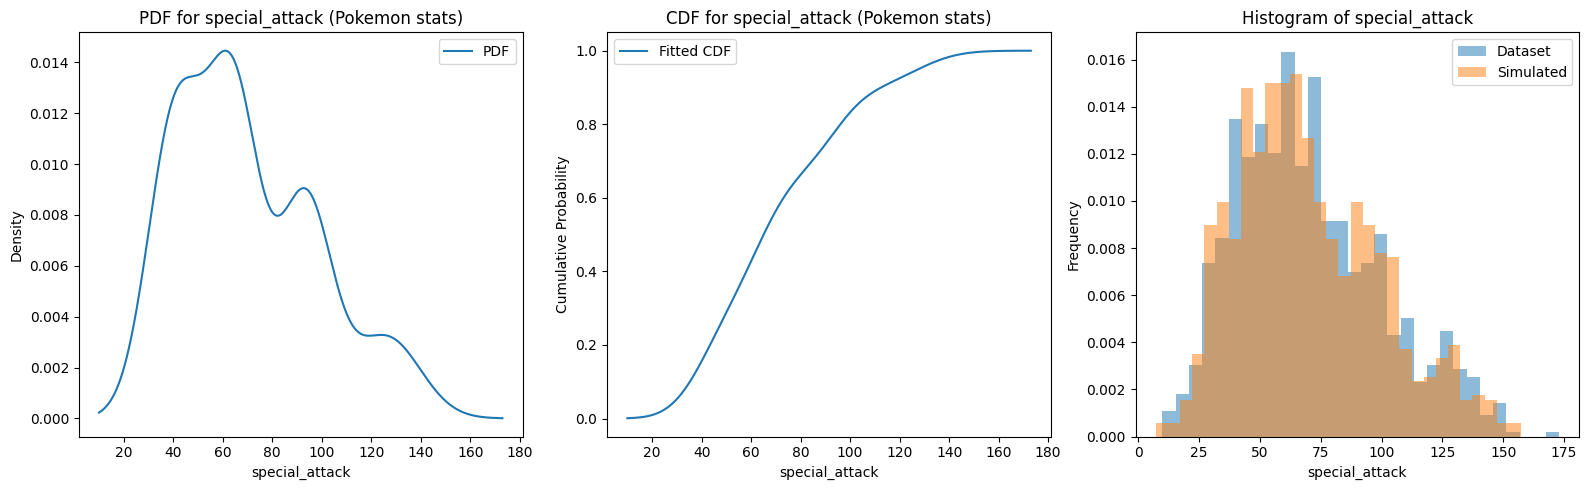

Fitting models for k = 2 to k = 10 for special_defense
K = 2, Log-Likelihood = -4783.36, AIC = 9578.73
K = 3, Log-Likelihood = -4770.86, AIC = 9559.72
K = 4, Log-Likelihood = -4770.06, AIC = 9564.12
K = 5, Log-Likelihood = -4770.06, AIC = 9570.12
K = 6, Log-Likelihood = -4770.44, AIC = 9576.87
K = 7, Log-Likelihood = -4770.56, AIC = 9583.12
K = 8, Log-Likelihood = -4761.32, AIC = 9570.64
K = 9, Log-Likelihood = -4752.46, AIC = 9558.91
K = 10, Log-Likelihood = -4752.27, AIC = 9564.53

Best Model for special_defense:
Number of components: 9
Weights: [0.10369646 0.27925924 0.10855013 0.15249723 0.05012812 0.00751698
 0.09317485 0.20322569 0.0019513 ]
Means: [102.91662576  53.10218742  81.06916596  36.28355347 125.08160693
 151.52355425  91.0684023   69.17119514 214.99757558]
Standard deviations: [ 7.59589684  7.35986863  3.52838744  7.86295769  9.23205557  1.94249782
  4.38733446  5.9764465  15.00475545]
Calculating the pdf and cdf:


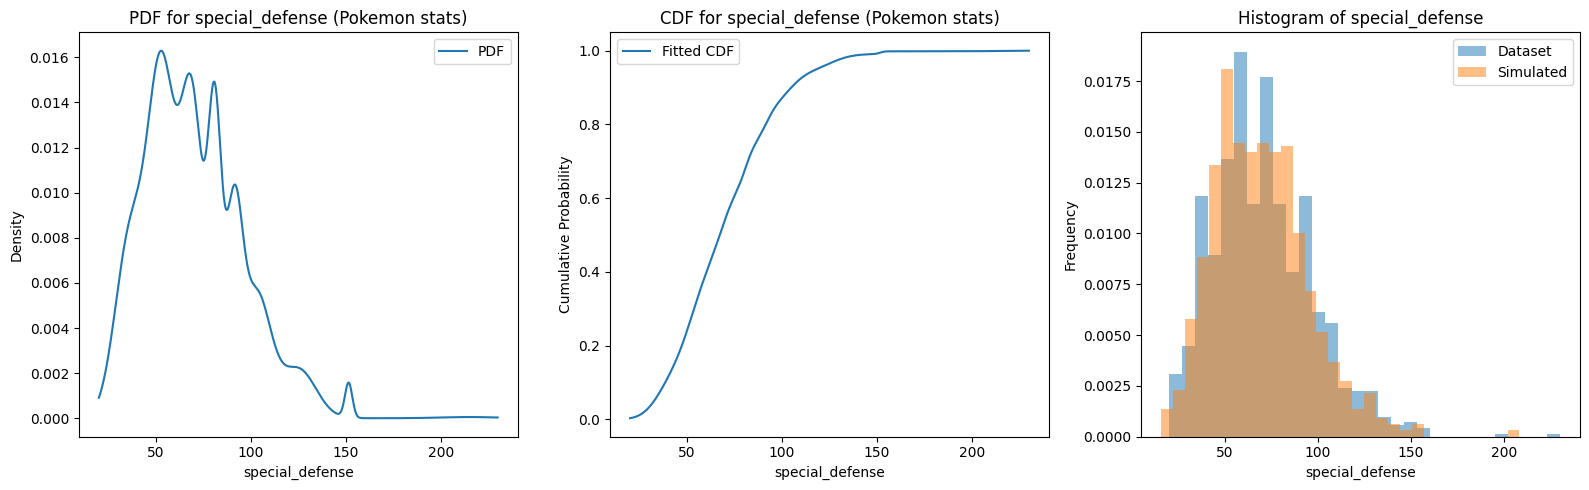

Fitting models for k = 2 to k = 10 for speed
K = 2, Log-Likelihood = -4874.77, AIC = 9761.54
K = 3, Log-Likelihood = -4874.69, AIC = 9767.39
K = 4, Log-Likelihood = -4868.77, AIC = 9761.53
K = 5, Log-Likelihood = -4869.48, AIC = 9768.96
K = 6, Log-Likelihood = -4867.94, AIC = 9771.89
K = 7, Log-Likelihood = -4853.58, AIC = 9749.15
K = 8, Log-Likelihood = -4861.95, AIC = 9771.90
K = 9, Log-Likelihood = -4862.00, AIC = 9778.00
K = 10, Log-Likelihood = -4858.29, AIC = 9776.59

Best Model for speed:
Number of components: 7
Weights: [0.18190022 0.22635649 0.19048091 0.06624689 0.20287244 0.13116744
 0.00097561]
Means: [ 30.046802    64.76256925  97.70978217 122.24741661  46.91639383
  81.10144863 200.        ]
Standard deviations: [9.68267514e+00 5.96850653e+00 8.94267788e+00 1.40423742e+01
 6.81451871e+00 5.88062880e+00 1.00000000e-03]
Calculating the pdf and cdf:


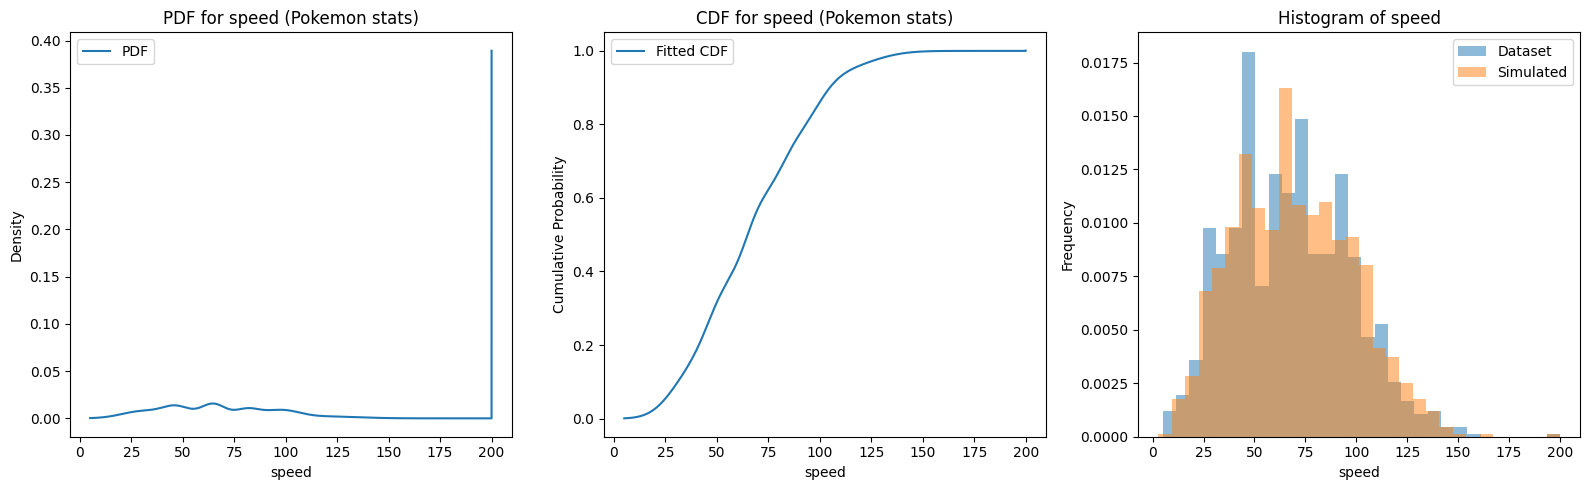

In [6]:
# iterate through the columns
for col in columns:
    # dropping NA values and convert to numpy
    data = pokemon[col].dropna().to_numpy()

    best_aic = float('inf')
    best_model = None
    best_params = None

    # fit the models using different k
    print(f"Fitting models for k = 2 to k = 10 for {col}")
    for i in range(2, 11):
        gmm = GMM()
        weights, means, sigmas = gmm.fit(data, i)
        aic = analyze.calc_AIC(data, weights, means, sigmas)
        log_likelihood = analyze.calc_llh(data, weights, means, sigmas)
        
        print(f"K = {i}, Log-Likelihood = {log_likelihood:.2f}, AIC = {aic:.2f}")

        # Update best model if this model has the lowest AIC
        if aic < best_aic:
            best_aic = aic
            best_model = gmm
            best_params = (i, weights, means, sigmas)

    # Getting the best model
    K, weights, means, sigmas = best_params
    print(f"\nBest Model for {col}:")
    print(f"Number of components: {K}")
    print(f"Weights: {weights}")
    print(f"Means: {means}")
    print(f"Standard deviations: {sigmas}")
    print("Calculating the pdf and cdf:")
    x_vals = np.linspace(min(data), max(data), 10000)
    pdf_vals = best_model.pdf(x_vals, weights, means, sigmas)
    cdf_vals = best_model.cdf(x_vals, weights, means, sigmas)
    simulated_data = best_model.rvs(wgt = weights, mu = means, sigma = sigmas, size = len(data))
    
    plt.figure(figsize = (16, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x_vals, pdf_vals, label = "PDF")
    plt.title(f"PDF for {col} (Pokemon stats)")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(x_vals, cdf_vals, label = "Fitted CDF")
    plt.title(f"CDF for {col} (Pokemon stats)")
    plt.xlabel(col)
    plt.ylabel("Cumulative Probability")
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.hist(data, bins = 30, alpha = 0.5, label = "Dataset", density = True)
    plt.hist(simulated_data, bins = 30, alpha = 0.5, label = "Simulated", density = True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()